# Probabilistic Graphs and Influence Maximization Lab

In [37]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import random as rnd

rnd.seed()

## Graph Input

In [38]:
G = nx.read_edgelist("karate")

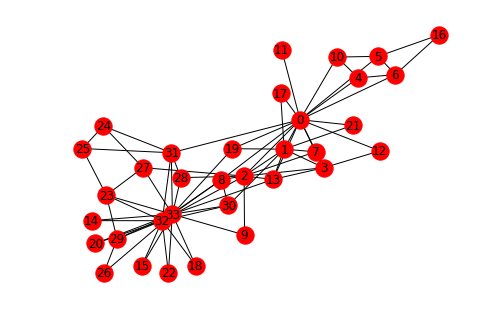

In [39]:
nx.draw(G, with_labels=True)
plt.show()

## Generating a Possible World

We set the probability of each edge:

In [40]:
p = 0.5

We define a method which takes a probabilistic graph, along with p and generates a possible world via sampling:

In [41]:
def gen_possible_world(G,p):
    F = nx.Graph()
    F.add_nodes_from(G) #every node in G belong to the possible world
    for e in G.edges():
        #for every edge in G, we sample the edge with probability p
        dice = rnd.random()
        if dice<=p: #we add th edge if the dice is successful
            F.add_edge(e[0],e[1])
    return F

In [42]:
G_p = gen_possible_world(G,p)

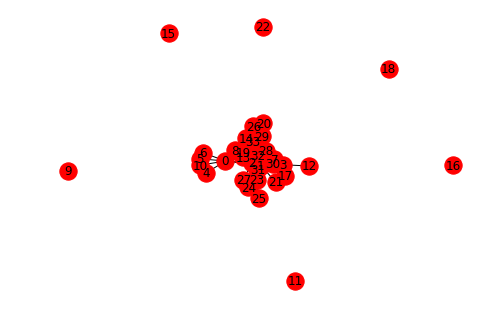

In [43]:
nx.draw(G_p, with_labels=True)
plt.show()

## Computing Reachability

We define a function which computes the reachability via sampling:

In [46]:
def reachability(G,s,t,p=0.1,rounds=1000):
    # G - the probabilistic graph
    # s - the source node
    # t - the target node
    # p - the value of the probability on each node
    # round - the number of sampling rounds
    good = 0
    for _ in range(rounds):
        G_p = gen_possible_world(G,p)
        if nx.has_path(G_p,s,t):
            good += 1
    return float(good)/float(rounds)

In [48]:
reachability(G,'5','1')

0.013